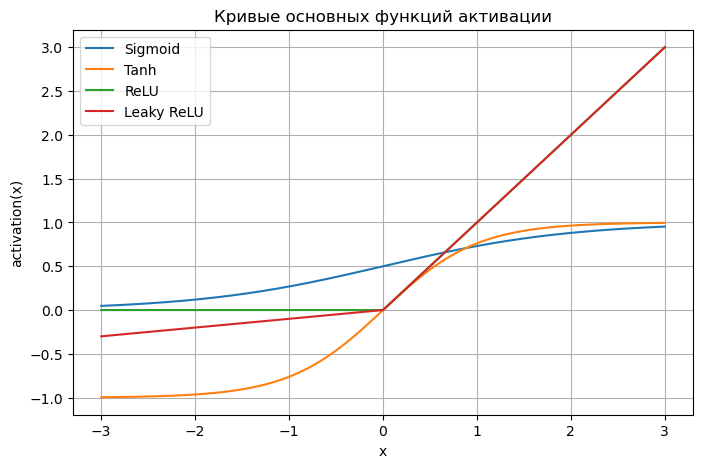

In [1]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

from func_activation import (
    relu,
    sigmoid,
    tanh,
    leaky_relu
)
# 1) Входные данные
x = np.linspace(-3, 3, 300)


# 3) Вычисление значений
y_sig = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky = leaky_relu(x, 0.1)

# 4) Визуализация (оставьте без изменений)
plt.figure(figsize=(8, 5))
plt.plot(x, y_sig, label='Sigmoid')
plt.plot(x, y_tanh, label='Tanh')
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_leaky, label='Leaky ReLU')
plt.title('Кривые основных функций активации')
plt.xlabel('x')
plt.ylabel('activation(x)')
plt.legend()
plt.grid(True)
plt.show()

sigmoid


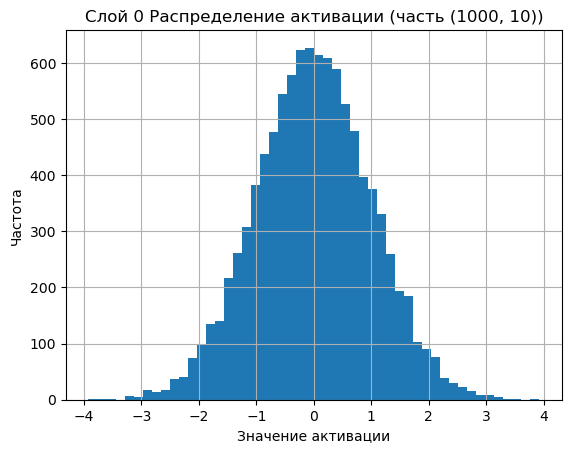

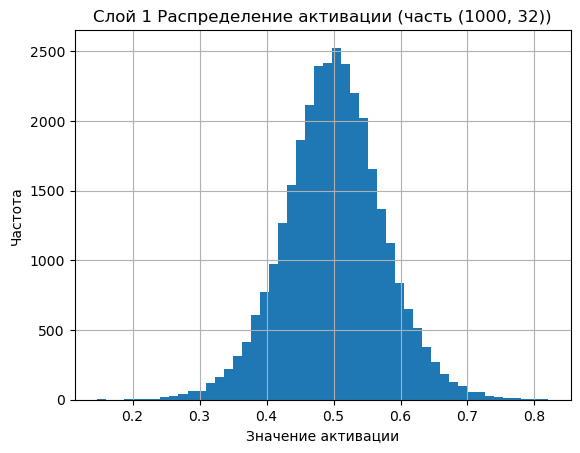

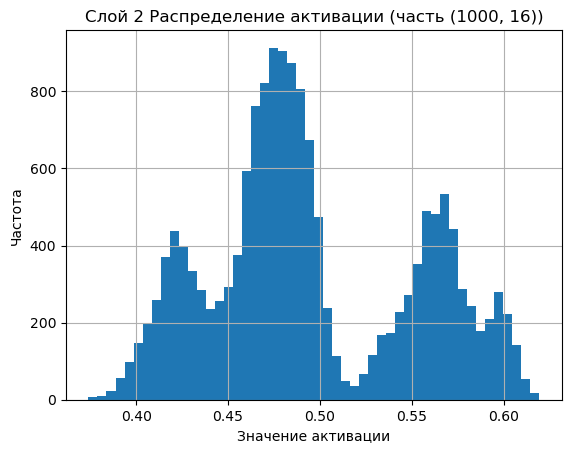

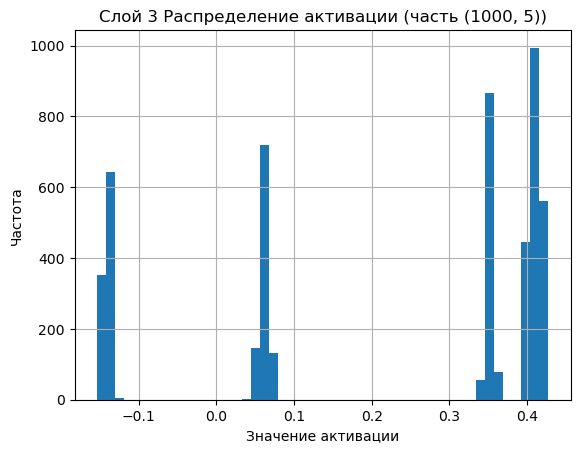

In [2]:
from basic_MLP import MLP

# Инициализируем модель с 4 слоями: 10 входов, 32 нейрон, 16 нейронов и 5 выходов
np.random.seed(42)
model = MLP([10, 32, 16, 5], activation='sigmoid')
X_rand = np.random.randn(1000, 10)

# Соберем активации
acts = model.forward_with_activations(X_rand)
print(model.activation)
# Отобразим активации каждого слоя
for idx, A in enumerate(acts):
    plt.figure()
    plt.hist(A.flatten(), bins=50)
    plt.title(f'Слой {idx} Распределение активации (часть {A.shape})')
    plt.xlabel('Значение активации')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

In [3]:
x = np.array([[1.0, 2.0, -1.0]])
# Запустим три MLP модели с архитектурой 3-2-1 и различными активациями в цикле
for act in ['relu', 'sigmoid', 'tanh']:
    np.random.seed(0)
    model_x = MLP([3,2,1], activation=act)
    y_pred = model_x.forward(x)
    print(f"{act}: y_pred={y_pred.ravel()[0]:.4f}, "
          f"len(Z_list)={len(model_x.Z_list)}, len(A_list)={len(model_x.A_list)}")

    # Отобразим значения Z и A
    for i, (Z, A) in enumerate(zip(model_x.Z_list, model_x.A_list)):
        print(f"Layer {i}: Z={Z.ravel()}, A={A.ravel()}")
    print()


relu: y_pred=0.0087, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.008746], A=[0.18539703 0.58592215]

sigmoid: y_pred=0.0422, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.04217181], A=[0.54621695 0.64242895]

tanh: y_pred=0.0094, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.00943941], A=[0.18330168 0.52695644]

